## Sequential Forward Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
#check row and columns
df.shape

(1303, 23)

In [6]:
#Check missing value
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
#check if any missing value
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22] # all columns/features except target 
y = df.iloc[:,-1]  #target

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
#training 0.3,
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Forward Selection

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(MLPClassifier(max_iter=2000),
                                                     k_features=22, #number of features
                                                     forward=True,   # Forward Feature
                                                     floating=False,
                                                     verbose=2,       #how model is fitted
                                                     scoring= "f1",   #performance matric
                                                     cv= 5).fit(X_train, y_train)   #cross validation
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    9.7s finished

[2022-11-03 01:05:00] Features: 1/22 -- score: 0.8442917150040152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   23.5s finished

[2022-11-03 01:05:24] Features: 2/22 -- score: 0.8478209668004304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   35.8s finished

[2022-11-03 01:06:00] Features: 3/22 -- score: 0.8556523587267344[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

{1: {'feature_idx': (10,),
  'cv_scores': array([0.83464567, 0.84444444, 0.84410646, 0.82666667, 0.87159533]),
  'avg_score': 0.8442917150040152,
  'feature_names': ('total_score',)},
 2: {'feature_idx': (2, 10),
  'cv_scores': array([0.86462882, 0.85087719, 0.84955752, 0.83333333, 0.84070796]),
  'avg_score': 0.8478209668004304,
  'feature_names': ('region', 'total_score')},
 3: {'feature_idx': (2, 10, 17),
  'cv_scores': array([0.875     , 0.86956522, 0.85087719, 0.81938326, 0.86343612]),
  'avg_score': 0.8556523587267344,
  'feature_names': ('region', 'total_score', 'ouwiki')},
 4: {'feature_idx': (2, 3, 10, 17),
  'cv_scores': array([0.86995516, 0.86725664, 0.85333333, 0.82882883, 0.86607143]),
  'avg_score': 0.8570890769704811,
  'feature_names': ('region', 'highest_education', 'total_score', 'ouwiki')},
 5: {'feature_idx': (2, 3, 5, 10, 17),
  'cv_scores': array([0.86725664, 0.86086957, 0.85333333, 0.84545455, 0.85964912]),
  'avg_score': 0.857312640796086,
  'feature_names': ('r

In [16]:
forward_feature_selection.k_feature_idx_  #index number of features that significant

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [17]:
forward_feature_selection.k_feature_names_ #name of the features choosen

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [18]:
forward_feature_selection.k_score_

0.6499397828464069

In [23]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("forward.mlp.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8346456692913387, 0.8444444444444444, 0.844...",0.844292,"(total_score,)",0.019486,0.015161,0.00758
2,"(2, 10)","[0.8646288209606987, 0.8508771929824561, 0.849...",0.847821,"(region, total_score)",0.013546,0.010539,0.005269
3,"(2, 10, 17)","[0.8749999999999999, 0.8695652173913043, 0.850...",0.855652,"(region, total_score, ouwiki)",0.025491,0.019833,0.009916
4,"(2, 3, 10, 17)","[0.8699551569506726, 0.8672566371681415, 0.853...",0.857089,"(region, highest_education, total_score, ouwiki)",0.019597,0.015247,0.007623
5,"(2, 3, 5, 10, 17)","[0.8672566371681415, 0.8608695652173914, 0.853...",0.857313,"(region, highest_education, age_band, total_sc...",0.009505,0.007395,0.003698
6,"(2, 3, 5, 10, 14, 17)","[0.8738738738738738, 0.849785407725322, 0.8521...",0.852667,"(region, highest_education, age_band, total_sc...",0.014735,0.011464,0.005732
7,"(2, 3, 5, 10, 13, 14, 17)","[0.8722466960352422, 0.8532110091743119, 0.844...",0.84855,"(region, highest_education, age_band, total_sc...",0.017899,0.013926,0.006963
8,"(2, 3, 5, 10, 13, 14, 16, 17)","[0.8722466960352422, 0.8595744680851064, 0.859...",0.849344,"(region, highest_education, age_band, total_sc...",0.024004,0.018676,0.009338
9,"(2, 3, 5, 7, 10, 13, 14, 16, 17)","[0.8544600938967135, 0.847926267281106, 0.8387...",0.849256,"(region, highest_education, age_band, studied_...",0.007348,0.005717,0.002859
10,"(1, 2, 3, 5, 7, 10, 13, 14, 16, 17)","[0.8444444444444444, 0.8340807174887893, 0.854...",0.851706,"(gender, region, highest_education, age_band, ...",0.016669,0.012969,0.006485


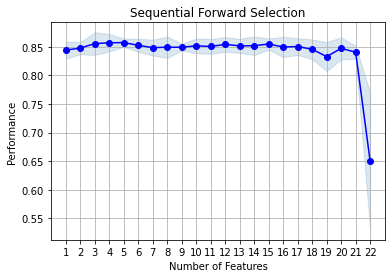

In [24]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [25]:
forward_feature_selection.k_feature_names_

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [22]:
forward_feature_selection.k_score_

0.6499397828464069